In [ ]:
import pandas as pd
import os


stack_data_dup = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_duplicate.csv')

In [ ]:
stack_data_non_dup_p1 = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_Part1.csv')
stack_data_non_dup_p2 = pd.read_csv('/content/drive/MyDrive/unzipped/Stack Overflow/SO_Part2.csv')

In [ ]:
stack_data_non_dup = pd.concat([stack_data_non_dup_p1,stack_data_non_dup_p2],axis=1)

In [ ]:
# Missing values present in the columns
def missing_values(df):
  print("Missing Values\n--------------")
  for col in df.columns:
    print("Column " + col + ' -- ' + str(sum(df[col].isna())))

In [ ]:
missing_values(stack_data_non_dup)

Missing Values
--------------
Column OId -- 0
Column OTitle -- 0
Column OBody -- 0
Column OTags -- 0
Column DId -- 0
Column DTitle -- 0
Column DBody -- 0
Column DTags -- 0
Column isDuplicate -- 0


In [ ]:
stack_data_non_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OId          50000 non-null  int64 
 1   OTitle       50000 non-null  object
 2   OBody        50000 non-null  object
 3   OTags        50000 non-null  object
 4   DId          50000 non-null  int64 
 5   DTitle       50000 non-null  object
 6   DBody        50000 non-null  object
 7   DTags        50000 non-null  object
 8   isDuplicate  50000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [ ]:
stack_data_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OId          50000 non-null  int64 
 1   OTitle       50000 non-null  object
 2   OBody        50000 non-null  object
 3   OTags        50000 non-null  object
 4   DId          50000 non-null  int64 
 5   DTitle       50000 non-null  object
 6   DBody        50000 non-null  object
 7   DTags        50000 non-null  object
 8   isDuplicate  50000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


In [ ]:
stack_data = pd.concat([stack_data_non_dup,stack_data_dup])

In [ ]:
# Shuffling all the rows in the dataset
import numpy as np


stack_data = stack_data.sample(frac = 1,random_state=101)

In [ ]:
stack_data.isDuplicate.value_counts()

1    50000
0    50000
Name: isDuplicate, dtype: int64

In [ ]:
stack_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
6324,4616202,Self-references in object literals / initializers,<p>Is there any way to get something like the ...,<javascript><object-literal>,4858931,reference variable in object literal?,<p>say I have</p>\n\n<pre><code>myfunc({\n va...,<javascript><object-literal>,1
2881,3242937,Ubuntu and Ruby version,<p>I have Ruby versions 1.8.7 and 1.9.1 on Ubu...,<ruby><ubuntu>,3243088,Installing RVM (Ruby Version Manager),<p>Can someone please translate this into mana...,<ruby>,1
10647,4945177,Printing from a Windows Service,<p>How can I printing a document on a specific...,<c#><printing><windows-services>,7990,Printing from a .NET Service,<p>I am working on a project right now that in...,<c#><.net><windows-services><printing>,1
42046,2656606,Can a file be opened simultaneously under SIlv...,<p>Silverlight uses an IsolatedStorageFileStre...,<c#><silverlight>,7800144,issue reading in data,<p>I am having trouble reading data from a fil...,<c++><fstream>,0
9912,2533249,Nested foreach in PHP produces different resul...,<p>I'm having problems to iterate twice on the...,<php><foreach>,7691790,Renaming project directory in VS 2010,<p>What would be a sequence of operations to r...,<visual-studio-2010>,0


Text(0, 0.5, 'No of Questions')

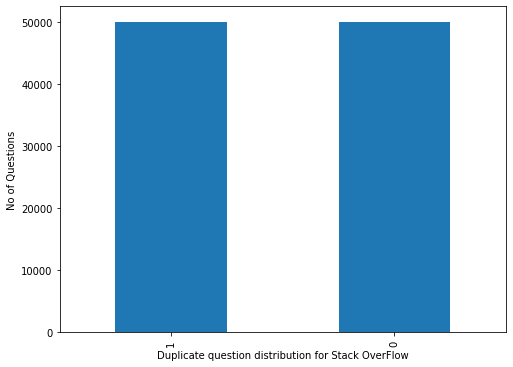

In [ ]:
ax = stack_data['isDuplicate'].value_counts().plot(kind='bar',figsize=(8, 6))
x_labels = ['non-duplicate', 'duplicate']

ax.set_xlabel('Duplicate question distribution for Stack OverFlow')
ax.set_ylabel('No of Questions')
# ax.bar_label(ax.containers[0], label_type='edge')

In [ ]:
basic_data = stack_data.sample(20000,random_state=101)

In [ ]:
## There are two columns for tags, OTags and DTags. Both contain several tags and needs to be cleaned and converted to texts

def remove_tags(text):
  return text.replace("<","").replace(">"," ")[:-1]

In [ ]:
## Calling the remove tags function and apply it on the two Tags columns

basic_data['OTags'] = basic_data.OTags.apply(remove_tags)
basic_data['DTags'] = basic_data.DTags.apply(remove_tags)

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,<p>Here is an example of the string I'm matchi...,regex,22444,My regex is matching too much. How do I make i...,<p>I have this gigantic ugly string:</p>\n<pre...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,<p>Just downloaded the new IE11 development ve...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",<p><strong>UPDATE</strong>: The old question a...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,<p>Is it possible to NSLog NSData in base 10. ...,ios objective-c c,6626038,Printing NSData using NSLog,<p>How can I print the contents of an NSData o...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,<p>I thought <code>@ViewScoped</code> was supp...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,<p>This doesn't seem right. I was doing some c...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address","<p>I need to submit an email address with a ""<...",iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,<p>We are working with Visual Studio 2010 and ...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
## Cleaning the questions from this step. Using the same data cleaning fucntion used for the Quora dataset, further spiking and implementation to be 
## done in case this isn't enough.

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords


# Lemmatize words

def get_pos_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        # As default pos in lemmatization is Noun
        return wordnet.NOUN

In [ ]:
## Things to be replaced and removed
import re 


regex = [
    r'<[^>]+>', #HTML tags
    r'@(\w+)', # @-mentions
    r"#(\w+)", # hashtags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'[^0-9a-z #+_\\r\\n\\t]', #BAD SYMBOLS
]

REPLACE_URLS = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
REPLACE_HASH = re.compile(r'#(\w+)')
REPLACE_AT = re.compile(r'@(\w+)')
REPLACE_HTML_TAGS = re.compile(r'<[^>]+>')
REPLACE_BY = re.compile(r"[^a-z0-9\-]")

In [ ]:
import nltk
nltk.download('stopwords')

nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')

nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
STOP_WORDS = set(stopwords.words('english'))

In [ ]:
lemmatizer = WordNetLemmatizer()

# User defined fucntion to replace and eliminate redundant values
def clean_data(text):
  text = text.lower()
  text = REPLACE_HTML_TAGS.sub(' ',text)
  text = REPLACE_URLS.sub('', text)
  text = REPLACE_HASH.sub('', text)
  text = REPLACE_AT.sub('', text)
  text = REPLACE_BY.sub(' ', text)

  text = " ".join(lemmatizer.lemmatize(word.strip(), get_pos_tag(pos_tag([word.strip()])[0][1])) \
                  for word in text.split() if word not in STOP_WORDS and len(word)>3)

  return text

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,<p>Here is an example of the string I'm matchi...,regex,22444,My regex is matching too much. How do I make i...,<p>I have this gigantic ugly string:</p>\n<pre...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,<p>Just downloaded the new IE11 development ve...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",<p><strong>UPDATE</strong>: The old question a...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,<p>Is it possible to NSLog NSData in base 10. ...,ios objective-c c,6626038,Printing NSData using NSLog,<p>How can I print the contents of an NSData o...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,<p>I thought <code>@ViewScoped</code> was supp...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,<p>This doesn't seem right. I was doing some c...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address","<p>I need to submit an email address with a ""<...",iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,<p>We are working with Visual Studio 2010 and ...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
## Applying the function to all the questions present in the original body column in order to check well the cleaning processed 
temp_storage = stack_data['OBody'].sample(100).apply(clean_data)

In [ ]:
## Selecting and printing random values, in order to see if any extra cleaning is required for the questions 
for row in temp_storage.sample(20):
  print(row)

menu text-align center margin auto pad height list-style none float left hover background-color border solid display block margin-right 18px margin-left 18px pad background-color color text-decoration none display none width 10em width help opera hover display block position absolute margin pad hover float none hover background-color border-bottom solid color hover background-color navbar href index start href index href index href ringsartikler href subitem href second subitem href numero tres href ringsfilmer href subitem href second subitem href numero tres navbar try text-align center margin auto still wont center whole menu change navbar float center instead float left make whole menu stupid
strip tag catch tag begin string work cause issue need remove html tag
little confuse cactus mock object jmock easy mock could anyone please answer follow question cactus test cactus test mock object test mock object test
try initialize static class member luck test file test string class test

In [ ]:
## Applying the function to all the questions present in the original body column in order to check well the cleaning processed 
basic_data['OBody'] = basic_data['OBody'].apply(clean_data)

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,<p>I have this gigantic ugly string:</p>\n<pre...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",<p><strong>UPDATE</strong>: The old question a...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,<p>How can I print the contents of an NSData o...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,<p>This doesn't seem right. I was doing some c...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,<p>We are working with Visual Studio 2010 and ...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
basic_data['DBody'] = basic_data['DBody'].apply(clean_data)

In [ ]:
## Add the following piece of code in the cleaning process, this steps first removes all the extra ---- presents in the data and also removes the
## whitespaces present in the data.

def rm_whitespace_hyphen(value):
  return ' '.join(value.replace("-","").split())

In [ ]:
basic_data['OBody'] = basic_data['OBody'].apply(rm_whitespace_hyphen)
basic_data['DBody'] = basic_data['DBody'].apply(rm_whitespace_hyphen)

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
from bs4 import BeautifulSoup

def fix_html(html):
    soup = BeautifulSoup(html)

    for a in soup.findAll('code'):
        a.replaceWith("CODE")

    return (soup.get_text()).replace("\\n",'\n')
    


In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,regex,1
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-c,1
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruct,1
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tfs,0


In [ ]:
basic_data['OBody'] = basic_data['OBody'].apply(lambda x: fix_html(x))

In [ ]:
basic_data['DBody'] = basic_data['DBody'].apply(lambda x: fix_html(x))

In [ ]:
#################################################################

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate,OBody_len,DBody_len
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,regex,1,271,359
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1,180,678
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-c,1,91,606
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruct,1,1203,173
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tfs,0,1122,414


In [ ]:
basic_data['OBody_len'] = basic_data['OBody'].str.len()
basic_data['DBody_len'] = basic_data['DBody'].str.len()

In [ ]:
def get_characters_agg(df,col_name):
  print('Minimum characters present in Question - ',df[col_name].min())
  print('Maximum characters present in Question - ',df[col_name].max())
  print('Average num of characters in Question - ', df[col_name].mean())

get_characters_agg(basic_data,'OBody_len')

Minimum characters present in Question -  0
Maximum characters present in Question -  23764
Average num of characters in Question -  466.27725


In [ ]:
import seaborn as sns

def plot_no_of_characters(df,col_name):
  g = sns.displot(df[col_name]).set(title='Analysis of the no of characters')
  g.set(xlim=(0, 2000))

In [ ]:
# Missing values present in the columns
def get_missing_values(df):
  print("Missing Values\n--------------")
  for col in df.columns:
    print("Column " + col + ' -- ' + str(sum(df[col].isna())))

get_missing_values(basic_data)

Missing Values
--------------
Column OId -- 0
Column OTitle -- 0
Column OBody -- 0
Column OTags -- 0
Column DId -- 0
Column DTitle -- 0
Column DBody -- 0
Column DTags -- 0
Column isDuplicate -- 0
Column OBody_len -- 0
Column DBody_len -- 0


In [ ]:
basic_data['OBody_len'].head()

20955     271
22107     180
27053      91
22483    1203
3808     1122
Name: OBody_len, dtype: int64

In [ ]:
basic_data['OBody_len'].isna().sum()

0

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate,OBody_len,DBody_len
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,regex,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,regex,1,271,359
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explorer,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1,180,678
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-c,1,91,606
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scope,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruct,1,1203,173
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.0,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tfs,0,1122,414


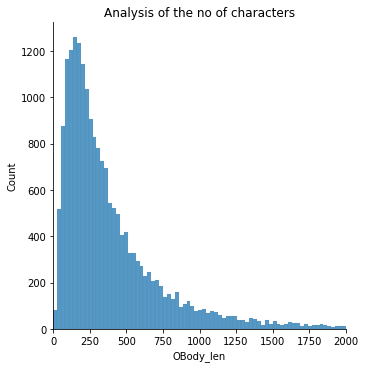

In [ ]:
plot_no_of_characters(basic_data,'OBody_len')

In [ ]:
# It is seen from the above graph and stats that most of the questions contains around 250 characters of questions.
# For our analyis we will consider first 300 characters from the questions

In [ ]:
## There are two columns for tags, OTags and DTags. Both contain several tags and needs to be cleaned and converted to texts

def remove_tags(text):
  return text.replace("<","").replace(">"," ")[:-1]

In [ ]:
## Calling the remove tags function and apply it on the two Tags columns

basic_data['OTags'] = basic_data.OTags.apply(remove_tags)
basic_data['DTags'] = basic_data.DTags.apply(remove_tags)

In [ ]:
basic_data.head()

,OId,OTitle,OBody,OTags,DId,DTitle,DBody,DTags,isDuplicate,OBody_len,DBody_len
20955,14665601,Regex too much or none at all.,example string match class unique href 2343242...,rege,22444,My regex is matching too much. How do I make i...,gigantic ugly string j0000000 transaction a000...,rege,1,271,359
22107,17953335,Browser Mode options missing from IE11's F12 D...,download ie11 development version wonder capab...,internet-explore,17871124,"How to bring back ""Browser mode"" in IE11?",update question applies ie11 preview browser m...,cross-browser ie-developer-tools internet-expl...,1,180,678
27053,18232254,NSData in base 10,possible nslog nsdata base basically byte arra...,ios objective-c,6626038,Printing NSData using NSLog,print content nsdata object use nslog void pos...,iphone objective-,1,91,606
22483,14812238,JSF View Scoped Bean Reconstructed Multiple Times,thought suppose prevent bean reconstruct user ...,jsf jakarta-ee ejb view-scop,5541813,@ViewScoped calls @PostConstruct on every post...,seem right cleanup code notice every ajax requ...,jsf jsf-2 constructor view-scope postconstruc,1,1203,173
3808,2509229,"a ""+"" sign in email address",need submit email address sign validate server...,iphone objective-c iphone-sdk-3.,7671327,Team Foundation services are not available fro...,work visual studio 2010 team foundation server...,visual-studio-2010 visual-studio-2012 tf,0,1122,414


In [ ]:
fixed_len_for_body = 300

def appending_original_data(row):
  if int(row['OBody_len']) > fixed_len_for_body:
    final_len = fixed_len_for_body
  else:
    final_len = int(row['OBody_len'])


  data = row['OTitle'] + ' ' + row['OTags'] + ' ' + row['OBody'][:fixed_len_for_body]
  return data


def appending_duplicate_data(row):
  if int(row['DBody_len']) > fixed_len_for_body:
    final_len = fixed_len_for_body
  else:
    final_len = int(row['DBody_len'])


  data = row['DTitle'] + ' ' + row['DTags'] + ' ' + row['DBody'][:fixed_len_for_body]
  return data

In [ ]:
basic_data.columns

Index(['OId', 'OTitle', 'OBody', 'OTags', 'DId', 'DTitle', 'DBody', 'DTags',
       'isDuplicate', 'OBody_len', 'DBody_len'],
      dtype='object')

In [ ]:
# Merging the OTitle, OBody and OTags into a single column inorder to grab all the features

basic_data['question1'] = basic_data.apply(lambda x: appending_original_data(x),axis=1)
basic_data['question2'] = basic_data.apply(lambda x: appending_duplicate_data(x),axis=1)

In [ ]:
basic_data['q1len'] = basic_data['question1'].str.len()
basic_data['q2len'] = basic_data['question2'].str.len()

In [ ]:
get_characters_agg(basic_data,'q1len')

Minimum characters present in Question -  37
Maximum characters present in Question -  505
Average num of characters in Question -  303.0369


In [ ]:
get_characters_agg(basic_data,'q2len')

Minimum characters present in Question -  38
Maximum characters present in Question -  501
Average num of characters in Question -  311.7378


In [ ]:
# Peform count vectorizer on the dataset by collecting the questions into one list 

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


# Merge all the question into one list
questions = list(basic_data['question1']) + list(basic_data['question2'])

cv = CountVectorizer(max_features=5000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
# np.save('q1_arr.npy', q1_arr)    # .npy extension is added if not given
# np.save('q2_arr.npy', q2_arr)
# d = np.load('test3.npy')

In [ ]:
## Take a backup of the complete dataframe before dropping the fields

backup_stack = basic_data.copy()

In [ ]:
basic_data.columns

Index(['OId', 'OTitle', 'OBody', 'OTags', 'DId', 'DTitle', 'DBody', 'DTags',
       'isDuplicate', 'OBody_len', 'DBody_len', 'question1', 'question2',
       'q1len', 'q2len'],
      dtype='object')

In [ ]:
# Drop the useless fields from the dataset

basic_data.drop(['OId', 'OTitle', 'OBody', 'OTags', 'DId', 'DTitle', 'DBody', 'DTags',
       'OBody_len', 'question1', 'DBody_len', 'question2',
       'q1len', 'q2len'], axis=1,inplace=True)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= basic_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= basic_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

#temp_df will have 6000 numerical features now, 3000 for question1 and another 3000 for question2

(20000, 10000)

In [ ]:
# get_missing_values(stack_data)
# stack_data.dropna(inplace=True)


In [ ]:
temp_df['isDuplicate'] = basic_data['isDuplicate']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=101)

In [ ]:
# Creating a basic Random Forest Classifier and verifying how it performs without much feature engineering and just on Numberical Features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_model = RandomForestClassifier()
random_model.fit(X_train,y_train)

y_pred = random_model.predict(X_test)
print("The accuracy using Random Forest Classifier is %f" %accuracy_score(y_test,y_pred))

The accuracy using Random Forest Classifier is 0.831250


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

print("The accuracy using Random XGB Classifier is %f" %accuracy_score(y_test,y_pred))

The accuracy using Random XGB Classifier is 0.839750
